In [1]:
# Hints for question 1 and 2

In [2]:
# Question 1

# the map is linear with peak at x=c
# you can make a drawing for yourself and find that
# the maps has 1/c slope in the left branch and -1/(1-c) slope in the right one, i.e.
# f(x)=x/c         in [0,c]
# f(x)=(1-x)/(1-c) in [c,1]

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


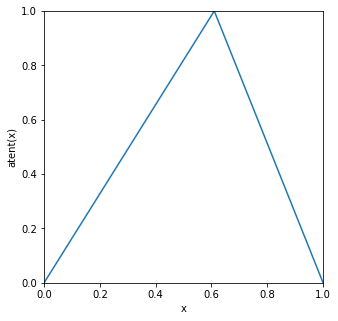

In [4]:
# define the mapping funtion

def atent(x,c):
    if x<c: return x/c        # linearly increases below c from 0 to 1
    else: return (1-x)/(1-c)  # linearly decreases above c from 1 to 0

# plot the map
c=0.61
xs=linspace(0,1,101)
ys=[]
for x in xs:
    ys.append(atent(x,c))  # collect the values of atent(x) in the list ys
figsize(5,5)
plot(xs,ys)
xlim(0,1)
ylim(0,1)
xlabel("x")
ylabel("atent(x)");

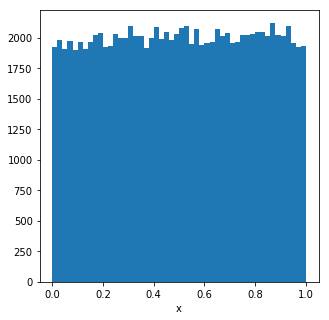

In [5]:
# iteration until a large t value
n=100000
x=0.42
xs=[x]
for k in range(1,n):
    x=atent(x,c)
    xs.append(x)    # collect the values of the iterates in the list xs

hist(xs,50);  # plot the histogram in 50 bins (nice histogram is usually obtained using approximately n**(1/3) bins)
xlabel("x");

The Lyapunov exponent can be calculated as time average using the equation
$$\lambda=\lim_{t\rightarrow\infty}\frac{1}{t}\sum_{k=0}^{t-1}\log |f'(x_k)|\;.$$

In [6]:
# f'(x) can be given by a new function
# simply copiing the mapping function and replacing the result values by the derivatives
# and of course changing the function name
def atentdiff(x,c):
    if x<c: return 1/c        # linearly increases below c from 0 to 1
    else: return -1/(1-c)  # linearly decreases above c from 1 to 0

# the above expression for the Lyapunov exponent using a large value of t
# we itarate the map as before, but now we do not need to collect the x values
# instead we sum up the values of the log term
t=1000000
x=0.42
logsum=0
for k in range(t):
    logsum+=log(abs(atentdiff(x,c)))
    x=atent(x,c)
print("Lyapunov exponent",logsum/t)
# Note, that unfortunately such sums converge slowly, so the result is precise upto about 3 digits
# but you can also test the precision choosing different initial points and different values of t

Lyapunov exponent 0.6685709512100037


In [7]:
# Question 2

# how to calculate the evolution of a probability density
# by the Frobenius-Perron operator of the asymmetric tent map
#


In [8]:
c=0.61                # an arbitrary value for the parameter of the map
# we want to generate gridpoints  x_k=k/n, k=0,1,2,...,n
n=10000                # the largest gridpoint index
x=linspace(0,1,n+1)   # the gridpoints
p0=linspace(0,2,n+1)  # the list of the values of an initial density at the grid points

In [9]:
p1=zeros(n+1)          # create an array in which the values of the resulting density will be stored

We want to use the equation
$$p_0(x)\rightarrow p_1(x)=\sum_{z:f(z)=x}\frac{p(z)}{f'(z)}=\hat F p_0(x)$$
for the evolution of the density.
For this purpose we need to determine which grid points correspond to the preimages of a gridpoint.
Since the density of the gridpoints is $1/n$ the gridpoint $i$ corresponds to $x=i/n$ .
Its left preimage is $c*i/n$ . Devided by $1/n$ the index of the closest gridpoint is obtained:
$$ j \approx \frac{c\cdot i/n}{1/n} = c\cdot i $$
If this is not integer it has to be rounded to get the index of the nearest gridpoint.
The index of the right preimage can be similarly obtained and used up in the iteration of the density as

In [10]:
for i in range(n+1):             # i.e. i=0,1,2,...,n
    j=round(i*c)                 # left preimage index
    k=round(n-i*(1-c))           # right preimage index
    p1[i]=p0[j]*c + p0[k]*(1-c)  # the sum of the contribution of the two branches

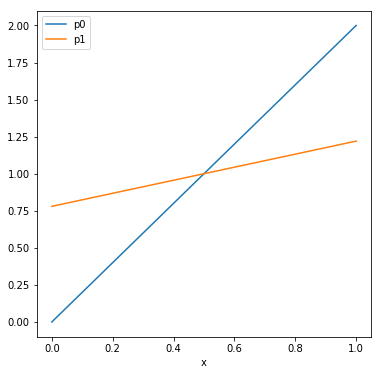

In [11]:
figsize(6,6)
plot(x,p0,label="p0")
plot(x,p1,label="p1")
legend()
xlabel("x");

In [12]:
# The limiting probability density is a constant 1.
# Here we can already see that p1 is closer to the limiting one than p0.

# Suggestions
#   for more convenient use create a function from these lines
#   which calculates the action of the Frobenius-Perron operator
#   and then iterate it several times and check the decay of the slope

In [13]:
def FP(p):
    p1=zeros(n+1)          # create an array in which the values of the resulting density will be stored

    for i in range(n+1):             # i.e. i=0,1,2,...,n
        j=round(i*c)                 # left preimage index
        k=round(n-i*(1-c))           # right preimage index
        p1[i]=p[j]*c + p[k]*(1-c)  # the sum of the contribution of the two branches
    return p1

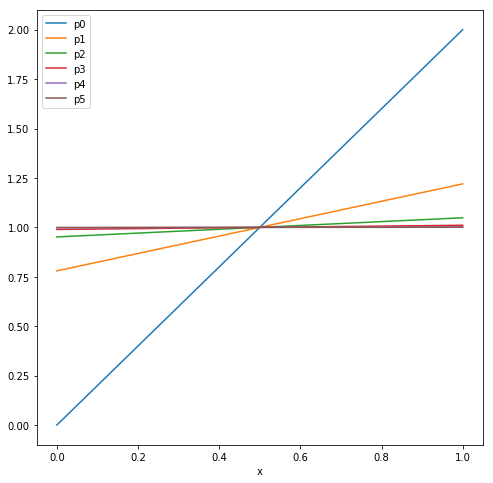

In [14]:
p=p0
figsize(8,8)
plot(x,p,label="p0")    # plot the initial density
for k in range(1,6):
    p=FP(p)                     # iterate the density
    plot(x,p,label="p"+str(k))  # plot the k times iterated density
legend()
xlabel("x");

decay rate 0.3633938895524603
decay rate 0.4995494025810073
decay rate 0.34731604771611596
decay rate 0.3098130270372947
decay rate 0.2969484079355556


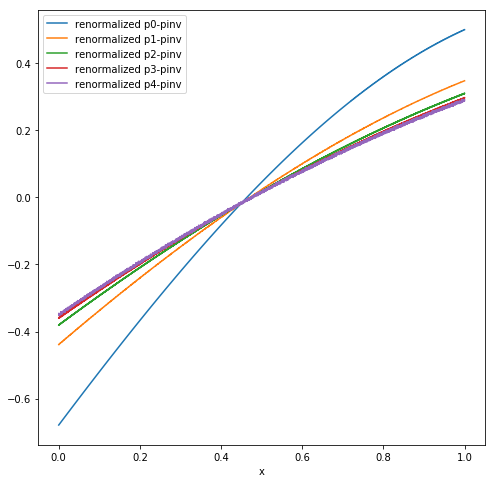

In [15]:
# Now check the convergence using a more general initial density
# and to see the deviation from the constant invariant density pinv
# we subtract the contribution of pinv in each step
p=sin(pi/2*x)      # non-linear initial density
figsize(8,8)
for k in range(0,5):
    p=p-mean(p)                  # here we subtract the contribution of pinv
    print("decay rate", max(p))  # this measures the deviation of p_k from pinv
    p=p/max(p)                   # this normalization ensures that the print shows the rate of the decay
    p=FP(p)                      # iterate the modified density
    plot(x,p,label="renormalized p"+str(k)+"-pinv")
legend()
xlabel("x");